# Visualisation [Marias](Maria.md) data
ID: tnK534JMwwfhvUEycn69HPbhqkt2
Marias data is presented below after one week of use, one month of use and one year of use. The data reflects her persona and travel patterns.

(158, 5)


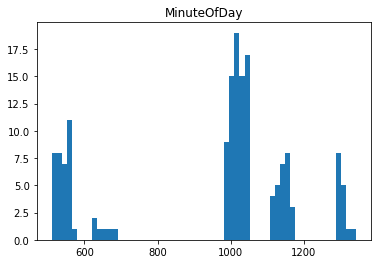

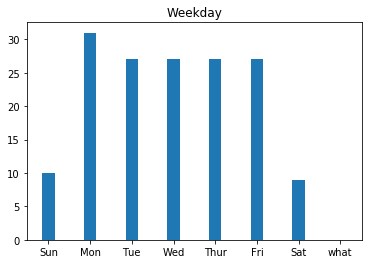

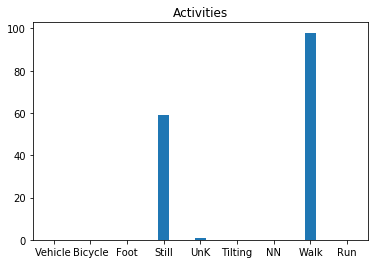

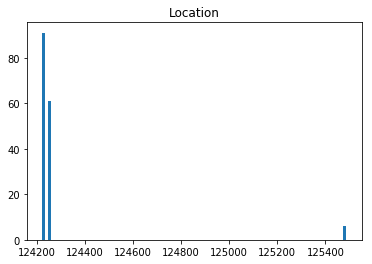

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import scipy.spatial.distance
##Uncomment here
#Week
trainingData = np.array(pd.read_csv("data/tnK534JMwwfhvUEycn69HPbhqkt2.csv",comment="-",skiprows=range(159,6762)))
#Month
#trainingData = np.array(pd.read_csv("data/tnK534JMwwfhvUEycn69HPbhqkt2.csv",comment="-",skiprows=range(500,6762)))
#Year
#trainingData = np.array(pd.read_csv("data/tnK534JMwwfhvUEycn69HPbhqkt2.csv",comment="-"))
print(trainingData.shape)
range(1001)
labelData = trainingData[:,4]
labelData = np.transpose(labelData)
trainingTuples = trainingData[:,:4]
#Minute
plt.title("MinuteOfDay")
plt.hist(trainingData[:,2],60)
plt.show()
#Weekday
names=["Sun","Mon","Tue","Wed","Thur","Fri","Sat","what"]
plt.title("Weekday")
x=plt.bar(names,np.bincount(trainingData[:,3],minlength=8),0.3,)
plt.show()
#Activities
names=["Vehicle","Bicycle","Foot","Still","UnK","Tilting","NN","Walk","Run"]
plt.title("Activities")
x=plt.bar(names,np.bincount(trainingData[:,0],minlength=9),0.3,)
plt.show()
#Location
plt.title("Location")
result2=np.true_divide(trainingData[:,1],10000)
plt.hist(result2,100)
plt.show()